In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold


## Import Data

In [2]:
fakebills = pd.read_csv('../archive/fake_bills.csv',sep=';')

## Explore Data  

In [3]:
# fakebills
# fakebills.shape
# fakebills.head(n=10)
# fakebills.tail(n=10)
# fakebills.describe
# fakebills.columns
# fakebills.isnull().sum()
fakebills.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [4]:
fakebills.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [5]:
fakebills.dropna(inplace=True)

In [6]:
fakebills.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

C:\Users\jonim\AppData\Local\Temp\ipykernel_4864\955250819.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_genuine',data=fakebills,palette='coolwarm')


<Axes: xlabel='is_genuine', ylabel='count'>

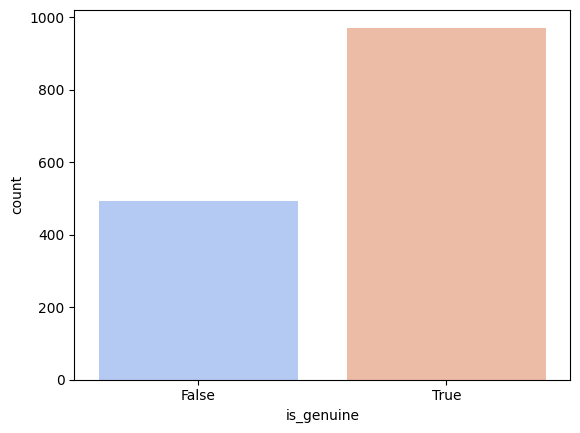

In [7]:
sns.countplot(x='is_genuine',data=fakebills,palette='coolwarm')

## Standardize Variables

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(fakebills.drop('is_genuine',axis=1))

StandardScaler()

In [10]:
scaled = scaler.transform(fakebills.drop('is_genuine',axis=1))

## Split Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled,fakebills['is_genuine'],
                                                    test_size=0.2, shuffle = True, random_state = 0)

## Build KNN Model

In [12]:
K=5
knn = KNeighborsClassifier(K)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(y_pred)

[False  True  True False  True  True False  True  True  True  True  True
  True False False  True  True False  True False  True  True  True  True
  True  True False  True  True  True False  True  True False  True  True
 False False  True  True  True  True  True False  True  True False  True
  True  True  True  True  True  True False  True False False False  True
  True  True  True  True  True False False False False  True False  True
  True False  True False  True False False False  True  True  True  True
  True False False False  True  True False  True  True False False  True
 False  True False  True  True  True False  True False  True  True False
  True  True  True  True  True False  True  True  True False False False
  True False  True False  True False  True  True False  True False  True
  True  True  True  True  True False  True  True False  True  True False
  True  True  True  True  True False False False False False  True False
  True False  True False  True False  True False  T

## Evaluate Model

In [13]:
accuracy_score(y_test, y_pred)

0.9863481228668942

## Test in loop with K value changing from 1-whatever 

In [14]:
for K in range(1, 21):
    # Initialize the k-NN classifier with current K
    knn = KNeighborsClassifier(n_neighbors=K)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print accuracy for each value of K
    print(f'Accuracy of k-NN classifier with K={K} is {accuracy:.2f}')

Accuracy of k-NN classifier with K=1 is 0.99
Accuracy of k-NN classifier with K=2 is 0.98
Accuracy of k-NN classifier with K=3 is 0.99
Accuracy of k-NN classifier with K=4 is 0.98
Accuracy of k-NN classifier with K=5 is 0.99
Accuracy of k-NN classifier with K=6 is 0.98
Accuracy of k-NN classifier with K=7 is 0.98
Accuracy of k-NN classifier with K=8 is 0.98
Accuracy of k-NN classifier with K=9 is 0.98
Accuracy of k-NN classifier with K=10 is 0.98
Accuracy of k-NN classifier with K=11 is 0.99
Accuracy of k-NN classifier with K=12 is 0.99
Accuracy of k-NN classifier with K=13 is 0.99
Accuracy of k-NN classifier with K=14 is 0.99
Accuracy of k-NN classifier with K=15 is 0.99
Accuracy of k-NN classifier with K=16 is 0.99
Accuracy of k-NN classifier with K=17 is 0.99
Accuracy of k-NN classifier with K=18 is 0.99
Accuracy of k-NN classifier with K=19 is 0.99
Accuracy of k-NN classifier with K=20 is 0.99


## K-Fold

In [18]:
# Define the number of folds
K = 5

# Set up K-Fold cross-validation
kf = KFold(n_splits=K, shuffle=True, random_state=0)

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation
cv_scores = cross_val_score(knn, scaled, fakebills['is_genuine'], cv=kf)

# Print out each fold's accuracy score and the mean accuracy
print("Accuracy scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

Accuracy scores for each fold: [0.98634812 0.98976109 0.98634812 0.99315068 0.99657534]
Mean cross-validation accuracy: 0.9904366730562438
